In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [0]:
data = pd.read_csv("project data.csv")
data.dtypes
data = data.set_index(['Date'])
vol = data['Vol.']
a=vol[0].strip().split()
data['Vol.'] = data['Vol.'].fillna(0.0)

In [0]:
for i in range(data['Vol.'].shape[0]):
    #print(data['Vol.'][i])
    if type(data['Vol.'][i]) != float and data['Vol.'][i].endswith('M'):
        data['Vol.'][i] = data['Vol.'][i][:-1]
        #print(data['Vol.'][i])
    else:
        data['Vol.'][i] = data['Vol.'][i]
        #print(data['Vol.'][i])

In [0]:
for i in range(data['Change %'].shape[0]):
    #print(data['Vol.'][i])
    if type(data['Change %'][i]) != float and data['Change %'][i].endswith('%'):
        data['Change %'][i] = data['Change %'][i][:-1]
        #print(data['Vol.'][i])
    else:
        data['Change %'][i] = data['Change %'][i]
        #print(data['Vol.'][i])

In [0]:
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

In [32]:
data.shape, X.shape, y.shape

((265, 6), (265, 5), (265,))

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05,random_state=0)

In [34]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
y_pred=svr.predict(X)
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_pred, y)

2.3916483699189506

In [36]:
r2_score(y_pred, y)

-2.4944593898873015

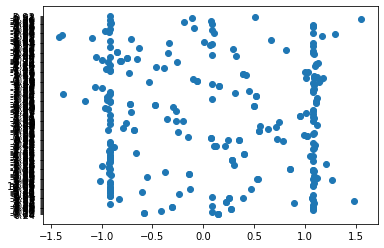

In [37]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, y)
plt.show()

In [0]:
#Implementing the Support Vector Regressor Algorithm in SBI stock Market Data.
#This algorithm is not suitable for this type of data because of mean square value not close to zero.